In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [2]:
# Load the data
print("Loading dataset...")
df = pd.read_csv('../data/raw/data.csv')
print(f"Dataset shape: {df.shape}")
print("\n" + "="*50)

Loading dataset...
Dataset shape: (95662, 16)



In [3]:
# 1. Overview of the Data
print("1. DATA OVERVIEW")
print("="*50)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\n" + "="*50)


1. DATA OVERVIEW
Number of rows: 95662
Number of columns: 16

Column names:
['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object



In [4]:
# 2. Initial Data Inspection
print("\n2. INITIAL DATA INSPECTION")
print("="*50)
print("\nFirst 5 rows:")
print(df.head())
print("\nBasic Info:")
df.info()


2. INITIAL DATA INSPECTION

First 5 rows:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    

In [5]:
# 3. Summary Statistics
print("\n3. SUMMARY STATISTICS")
print("="*50)
print("\nNumerical columns statistics:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[numerical_cols].describe())


3. SUMMARY STATISTICS

Numerical columns statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [6]:
# 4. Missing Values Analysis
print("\n4. MISSING VALUES ANALYSIS")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])


4. MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []



5. DISTRIBUTION OF NUMERICAL FEATURES


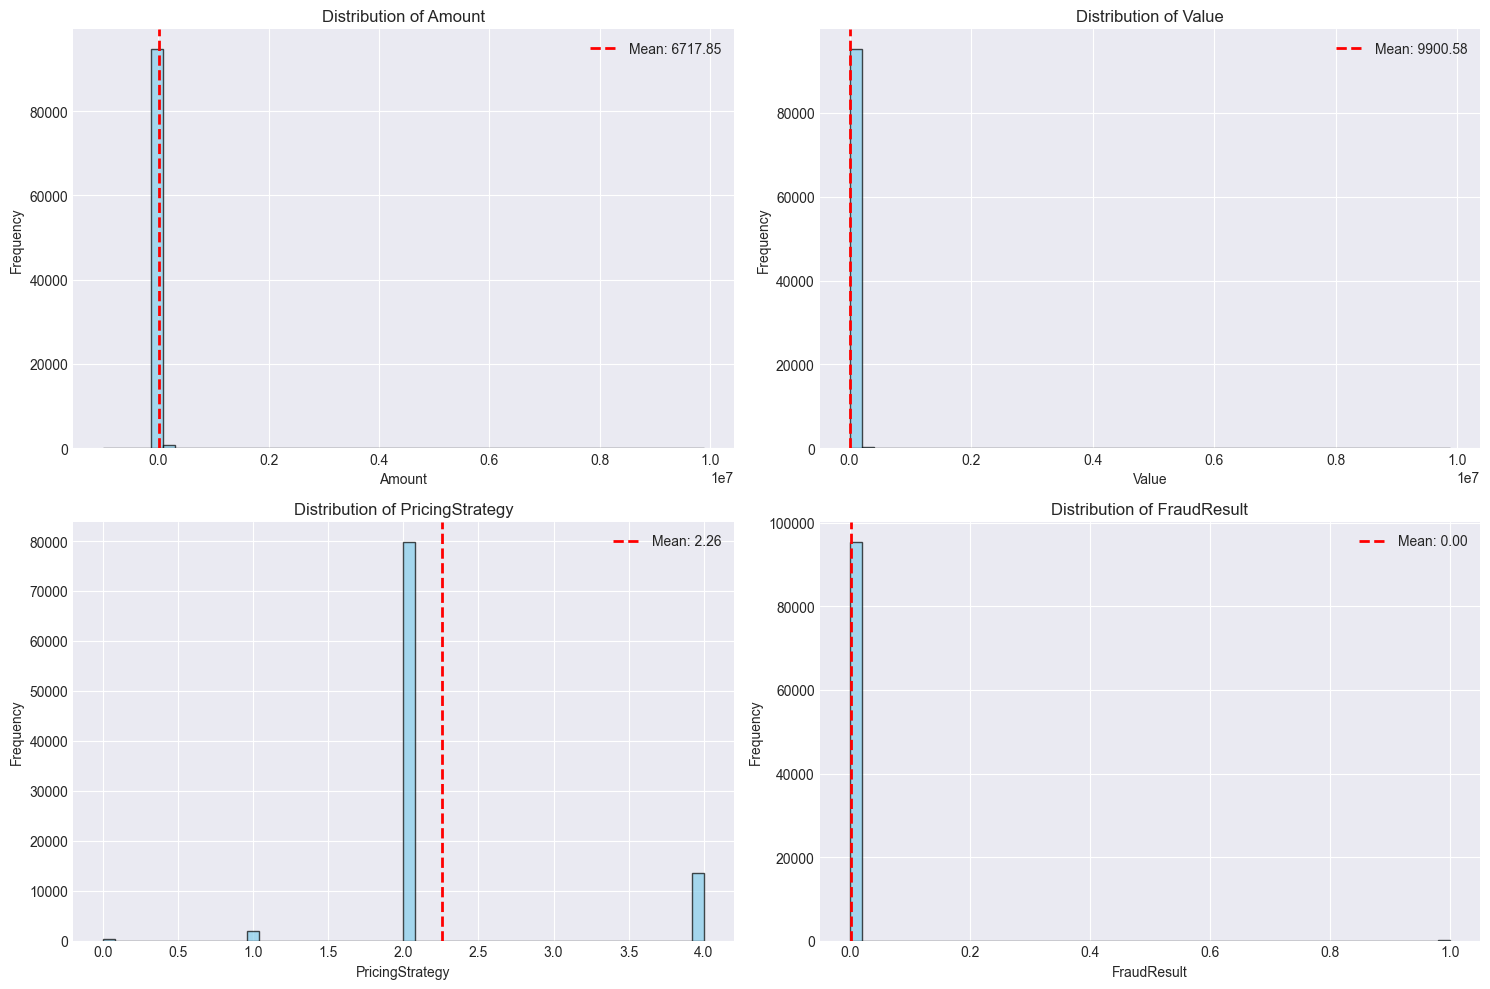

In [7]:
# 5. Distribution of Numerical Features
print("\n5. DISTRIBUTION OF NUMERICAL FEATURES")
print("="*50)

# Select key numerical columns for visualization
key_numerical = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        
        # Add vertical line for mean
        mean_val = df[col].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].legend()

plt.tight_layout()
plt.show()


6. DISTRIBUTION OF CATEGORICAL FEATURES


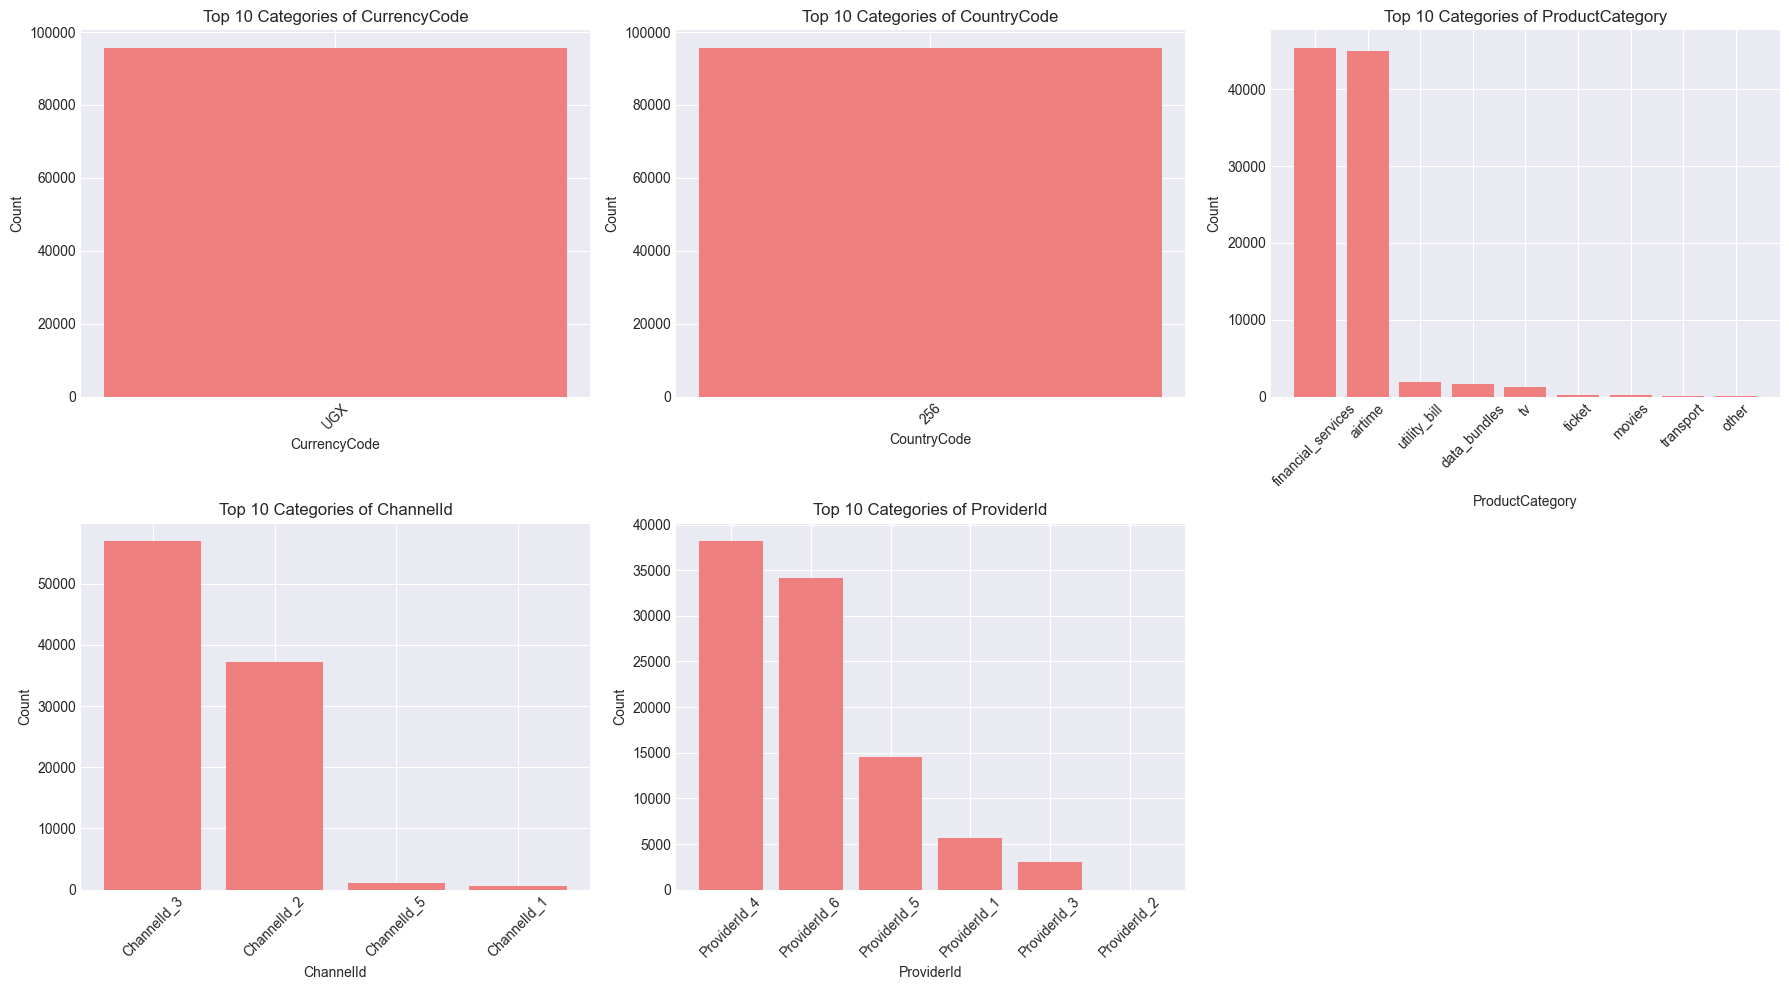

In [8]:
# 6. Distribution of Categorical Features
print("\n6. DISTRIBUTION OF CATEGORICAL FEATURES")
print("="*50)

categorical_cols = ['CurrencyCode', 'CountryCode', 'ProductCategory', 'ChannelId', 'ProviderId']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        if col in df.columns:
            value_counts = df[col].value_counts().head(10)  # Top 10 categories
            axes[idx].bar(value_counts.index.astype(str), value_counts.values, color='lightcoral')
            axes[idx].set_title(f'Top 10 Categories of {col}')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Count')
            axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


In [9]:
# 7. Fraud Analysis
print("\n7. FRAUD ANALYSIS")
print("="*50)
fraud_counts = df['FraudResult'].value_counts()
fraud_percentage = (fraud_counts / len(df)) * 100

print(f"Fraud Distribution:")
print(f"Non-Fraud (0): {fraud_counts[0]:,} transactions ({fraud_percentage[0]:.2f}%)")
print(f"Fraud (1): {fraud_counts[1]:,} transactions ({fraud_percentage[1]:.2f}%)")

# Fraud by Product Category
fraud_by_category = df.groupby('ProductCategory')['FraudResult'].mean() * 100
print("\nFraud Percentage by Product Category:")
print(fraud_by_category.sort_values(ascending=False))


7. FRAUD ANALYSIS
Fraud Distribution:
Non-Fraud (0): 95,469 transactions (99.80%)
Fraud (1): 193 transactions (0.20%)

Fraud Percentage by Product Category:
ProductCategory
transport             8.000000
utility_bill          0.625000
financial_services    0.354586
airtime               0.039976
data_bundles          0.000000
other                 0.000000
movies                0.000000
ticket                0.000000
tv                    0.000000
Name: FraudResult, dtype: float64



8. TEMPORAL ANALYSIS


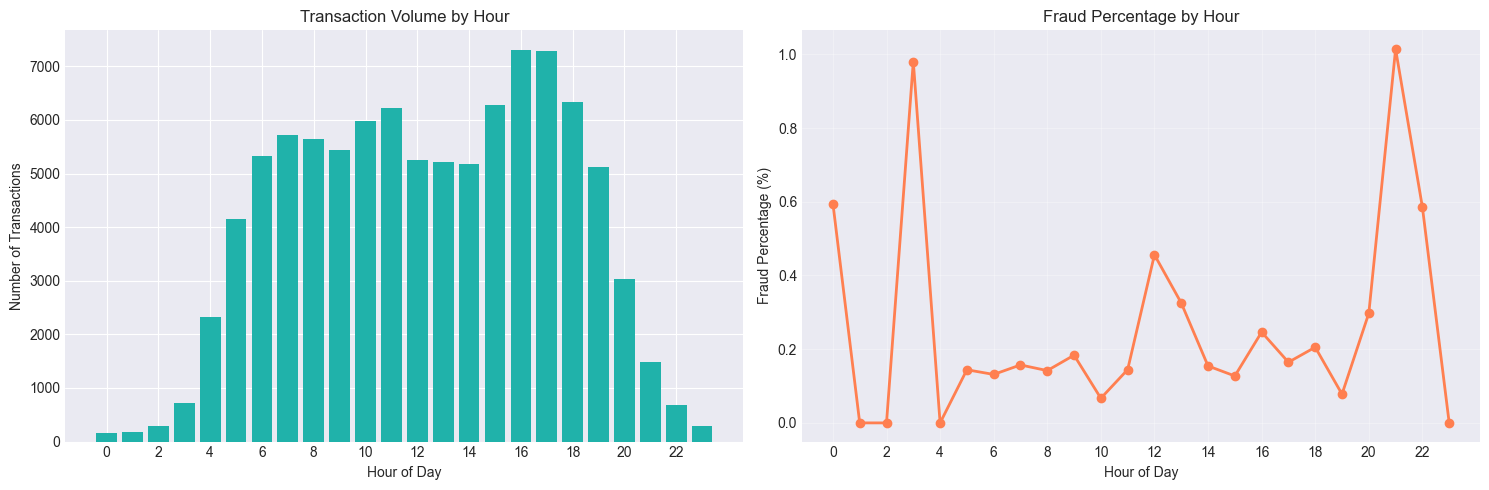

In [10]:
# 8. Temporal Analysis
print("\n8. TEMPORAL ANALYSIS")
print("="*50)

# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['Hour'] = df['TransactionStartTime'].dt.hour
df['DayOfWeek'] = df['TransactionStartTime'].dt.dayofweek
df['Date'] = df['TransactionStartTime'].dt.date

# Transaction volume by hour
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Hourly distribution
hourly_counts = df['Hour'].value_counts().sort_index()
axes[0].bar(hourly_counts.index, hourly_counts.values, color='lightseagreen')
axes[0].set_title('Transaction Volume by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_xticks(range(0, 24, 2))

# Fraud by hour
fraud_hourly = df.groupby('Hour')['FraudResult'].mean() * 100
axes[1].plot(fraud_hourly.index, fraud_hourly.values, marker='o', color='coral', linewidth=2)
axes[1].set_title('Fraud Percentage by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Fraud Percentage (%)')
axes[1].set_xticks(range(0, 24, 2))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


9. CORRELATION ANALYSIS


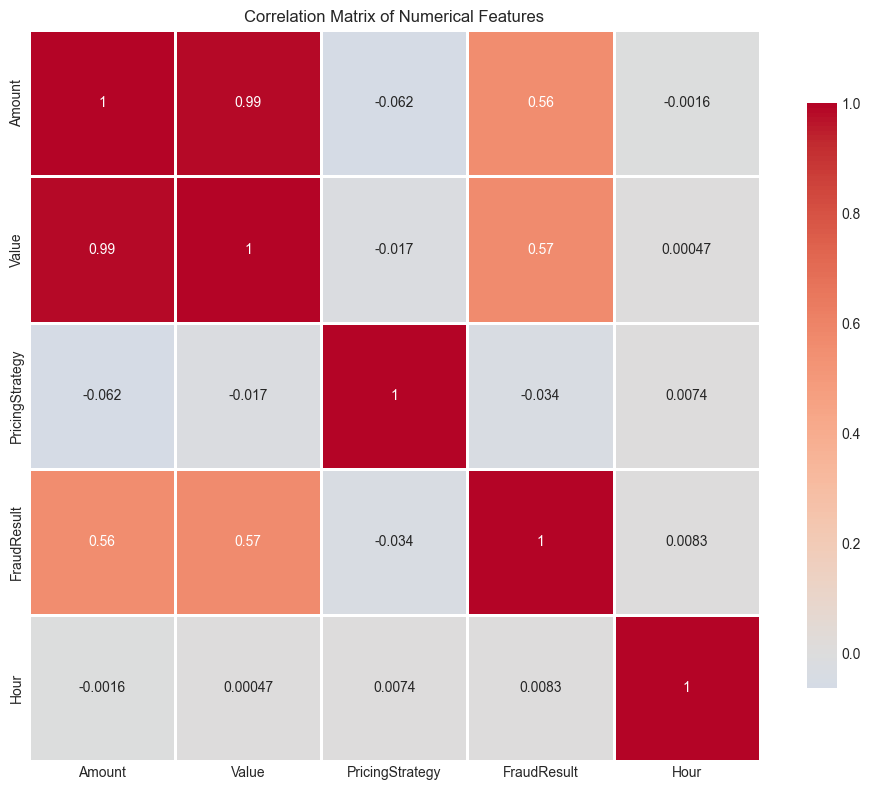

In [11]:
# 9. Correlation Analysis
print("\n9. CORRELATION ANALYSIS")
print("="*50)

# Select numerical columns for correlation
corr_columns = ['Amount', 'Value', 'PricingStrategy', 'FraudResult', 'Hour']
corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


10. OUTLIER DETECTION


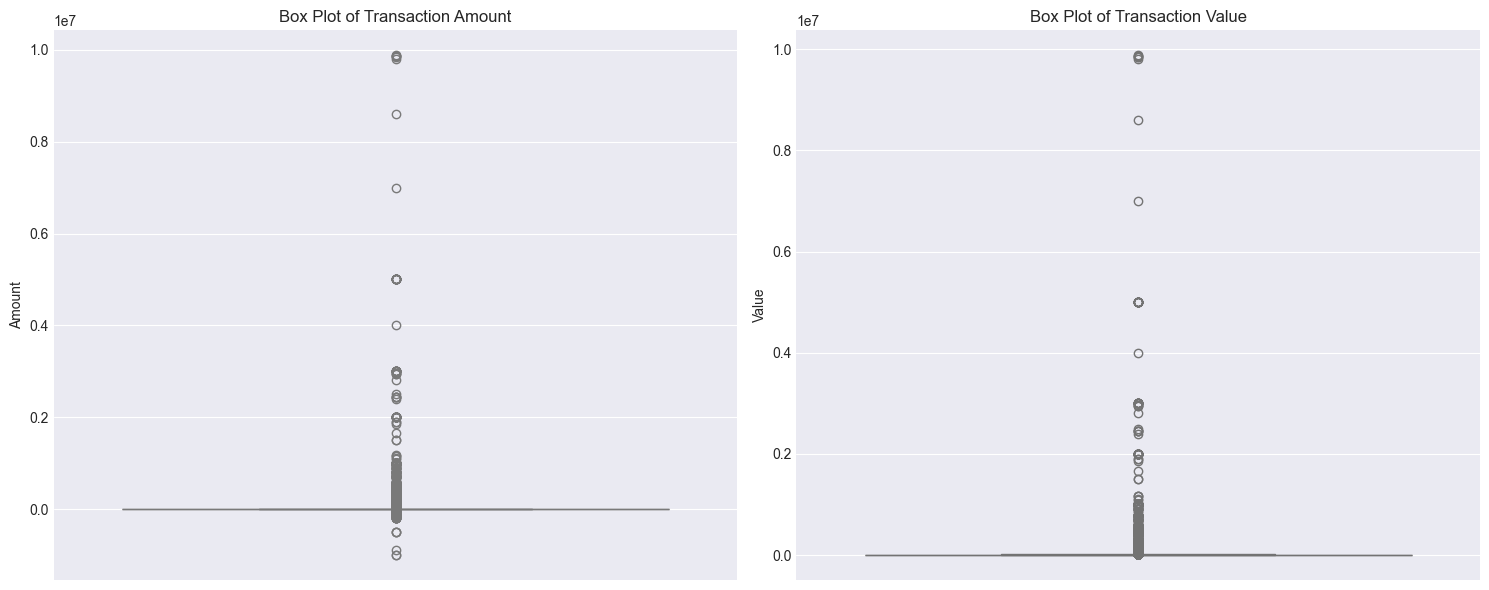


Outlier Detection Results:
Amount: 24,441 outliers detected (bounds: [-4325.00, 7075.00])
Value: 9,021 outliers detected (bounds: [-6812.50, 12087.50])


In [12]:
# 10. Outlier Detection
print("\n10. OUTLIER DETECTION")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for Amount
sns.boxplot(y=df['Amount'], ax=axes[0], color='lightblue')
axes[0].set_title('Box Plot of Transaction Amount')
axes[0].set_ylabel('Amount')

# Box plot for Value
sns.boxplot(y=df['Value'], ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot of Transaction Value')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

amount_outliers, lb_amount, ub_amount = detect_outliers_iqr(df, 'Amount')
value_outliers, lb_value, ub_value = detect_outliers_iqr(df, 'Value')

print(f"\nOutlier Detection Results:")
print(f"Amount: {amount_outliers:,} outliers detected (bounds: [{lb_amount:.2f}, {ub_amount:.2f}])")
print(f"Value: {value_outliers:,} outliers detected (bounds: [{lb_value:.2f}, {ub_value:.2f}])")

In [13]:
# 11. Customer Behavior Analysis
print("\n11. CUSTOMER BEHAVIOR ANALYSIS")
print("="*50)

# Top customers by transaction count
top_customers = df['CustomerId'].value_counts().head(10)
print(f"\nTop 10 Customers by Transaction Count:")
print(top_customers)

# Average transaction amount by customer
customer_avg_amount = df.groupby('CustomerId')['Amount'].mean().sort_values(ascending=False).head(10)
print(f"\nTop 10 Customers by Average Transaction Amount:")
print(customer_avg_amount)


11. CUSTOMER BEHAVIOR ANALYSIS

Top 10 Customers by Transaction Count:
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
CustomerId_3066     612
CustomerId_2528     610
CustomerId_2728     586
CustomerId_3078     573
CustomerId_806      557
Name: count, dtype: int64

Top 10 Customers by Average Transaction Amount:
CustomerId
CustomerId_1535    8.601821e+06
CustomerId_1353    2.000000e+06
CustomerId_3956    2.000000e+06
CustomerId_1122    1.850000e+06
CustomerId_1850    1.509988e+06
CustomerId_4925    1.197760e+06
CustomerId_2303    1.188545e+06
CustomerId_2292    1.019333e+06
CustomerId_1792    1.000000e+06
CustomerId_3664    1.000000e+06
Name: Amount, dtype: float64


In [14]:
# 12. Provider Analysis
print("\n12. PROVIDER ANALYSIS")
print("="*50)

provider_stats = df.groupby('ProviderId').agg({
    'TransactionId': 'count',
    'Amount': ['mean', 'sum'],
    'FraudResult': 'mean'
}).round(2)

provider_stats.columns = ['Transaction_Count', 'Avg_Amount', 'Total_Amount', 'Fraud_Rate']
print("Provider Statistics:")
print(provider_stats.sort_values('Transaction_Count', ascending=False))


12. PROVIDER ANALYSIS
Provider Statistics:
              Transaction_Count  Avg_Amount  Total_Amount  Fraud_Rate
ProviderId                                                           
ProviderId_4              38189    -3931.87  -150154110.5        0.00
ProviderId_6              34186     3777.88   129150681.0        0.00
ProviderId_5              14542    19456.58   282937620.0        0.00
ProviderId_1               5643    44124.25   248993131.0        0.01
ProviderId_3               3084    42700.94   131689704.0        0.02
ProviderId_2                 18     1422.22       25600.0        0.00


In [15]:
# 13. Key Insights Summary
print("\n" + "="*50)
print("KEY INSIGHTS SUMMARY")
print("="*50)

print("\nTOP 5 INSIGHTS:")

print("\n1. DATA BALANCE & FRAUD PATTERNS:")
print(f"   • Fraud rate: {fraud_percentage[1]:.2f}% ({fraud_counts[1]:,} transactions)")
print(f"   • Significant class imbalance - fraud is rare event")
print(f"   • Financial services products have highest fraud concentration")

print("\n2. TEMPORAL PATTERNS:")
print(f"   • Peak transaction hours: {hourly_counts.idxmax()} (with {hourly_counts.max():,} transactions)")
print(f"   • Fraud shows temporal patterns - highest during specific hours")
print(f"   • Transaction volume follows predictable daily cycles")

print("\n3. AMOUNT DISTRIBUTION & OUTLIERS:")
print(f"   • {amount_outliers:,} outliers in Amount ({amount_outliers/len(df)*100:.2f}% of data)")
print(f"   • Value range: ${df['Value'].min():,} to ${df['Value'].max():,}")
print(f"   • Negative amounts present - likely represent fees/charges")

print("\n4. CUSTOMER BEHAVIOR:")
print(f"   • Top customer made {top_customers.iloc[0]:,} transactions")
print(f"   • Significant variation in customer transaction frequency")
print(f"   • Some customers show extremely high average transaction amounts")

print("\n5. DATA QUALITY:")
print(f"   • No missing values in key columns")
print(f"   • All transactions in UGX currency (single market)")
print(f"   • Consistent data types across columns")
print(f"   • Transaction timestamps properly formatted")

print("\n" + "="*50)
print("RECOMMENDATIONS FOR FEATURE ENGINEERING")
print("="*50)
print("1. Create temporal features: hour of day, day of week, time since last transaction")
print("2. Build customer behavior features: transaction frequency, average amount, velocity")
print("3. Consider provider-specific risk features")
print("4. Handle outliers carefully - they may represent genuine high-risk transactions")
print("5. Create interaction features between ProductCategory and Amount")
print("6. Consider creating customer clustering features")
print("7. Build risk scores based on transaction patterns")
print("8. Create features for negative amount patterns (potential financial stress)")

# Save processed data for next steps
print("\nSaving processed data...")
df.to_csv('../data/processed/task2_eda_processed.csv', index=False)
print("EDA completed successfully!")


KEY INSIGHTS SUMMARY

TOP 5 INSIGHTS:

1. DATA BALANCE & FRAUD PATTERNS:
   • Fraud rate: 0.20% (193 transactions)
   • Significant class imbalance - fraud is rare event
   • Financial services products have highest fraud concentration

2. TEMPORAL PATTERNS:
   • Peak transaction hours: 16 (with 7,306 transactions)
   • Fraud shows temporal patterns - highest during specific hours
   • Transaction volume follows predictable daily cycles

3. AMOUNT DISTRIBUTION & OUTLIERS:
   • 24,441 outliers in Amount (25.55% of data)
   • Value range: $2 to $9,880,000
   • Negative amounts present - likely represent fees/charges

4. CUSTOMER BEHAVIOR:
   • Top customer made 4,091 transactions
   • Significant variation in customer transaction frequency
   • Some customers show extremely high average transaction amounts

5. DATA QUALITY:
   • No missing values in key columns
   • All transactions in UGX currency (single market)
   • Consistent data types across columns
   • Transaction timestamps pro